In [24]:
import xarray as xr

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

from bs_fdbck.constants import measurements_path, path_outdata, path_extract_latlon_outdata

In [25]:
xr.set_options(keep_attrs=True) 

In [26]:
path_extract_latlon_outdata

PosixPath('/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/extracted_latlon_subset')

In [27]:
lat_smr = 61.85
lon_smr = 24.28

In [28]:
case_name = 'OsloAero_intBVOC_pertSizeDist_f19_f19_mg17_full'

In [6]:
fn = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0.nc'
fn_comb_lev1 = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0_lev1.nc'

In [30]:
fn2 = fn.parent / f'{fn.stem}_sort.nc'

In [31]:


cases = [case_name]

In [32]:
from pathlib import Path

In [33]:
plot_path = Path('Plots')

In [34]:
def make_fn(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [35]:
plot_path.mkdir(exist_ok=True, parents=True)

In [36]:
varl =['DOD500','DOD440','ACTREL','ACTNL','TGCLDLWP', #,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','FCTL',
       'TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP',
       #'TAUTLOGMODIS',
       #'MEANTAU_ISCCP',
       #'LWPMODIS','CLWMODIS','REFFCLWMODIS',#'TAUTMODIS','TAUWMODIS',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [37]:
varl_st = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3']

## Load observations: 

## Open model dataset: 


In [15]:
model_lev_i=-1

In [16]:
ds_mod = xr.open_dataset(fn, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
#ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

In [17]:
ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')

ds_mod = ds_mod.sortby('time')#.sel(time=slice('2012','2014'))



In [18]:
ds_mod = ds_mod.isel(lev = model_lev_i)

ds_mod1

In [19]:
import dask.array as da
from dask.diagnostics import ProgressBar

In [20]:
delayed_obj = ds_mod.to_netcdf(fn_comb_lev1, compute=False)
with ProgressBar(): 
    results = delayed_obj.compute()

[########################################] | 100% Completed | 37min 34.7s


In [16]:
import dask.array as da
from dask.diagnostics import ProgressBar

delayed_obj = ds_mod1.to_netcdf(fn1_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()
    
    

delayed_obj = ds_mod2.to_netcdf(fn2_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()

ds_mod = xr.open_mfdataset([fn1_2,fn2_2], combine='by_coords', concat_dim='time')

In [17]:
ds_mod = xr.open_dataset(fn_comb_lev1, chunks = {'time':48})

In [18]:
ds_mod.compute()

<xarray.Dataset>
Dimensions:              (time: 23280, lat: 3, lon: 4, cosp_dbze: 15, nbnd: 2, cosp_ht: 40, cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6, cosp_reffliq: 6, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7, cosp_tau_modis: 7, ilev: 33)
Coordinates: (12/16)
  * cosp_dbze            (cosp_dbze) float64 -72.5 -42.5 -37.5 ... 17.5 50.0
  * cosp_ht              (cosp_ht) float64 1.896e+04 1.848e+04 ... 720.0 240.0
  * cosp_htmisr          (cosp_htmisr) float64 0.0 250.0 ... 1.6e+04 1.8e+04
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_reffice         (cosp_reffice) float64 5e-06 1.5e-05 ... 5e-05 7.5e-05
  * cosp_reffliq         (cosp_reffliq) float64 4e-06 9e-06 ... 1.75e-05 2.5e-05
    ...                   ...
  * cosp_tau_modis       (cosp_tau_modis) float64 0.15 0.8 2.45 ... 41.5 100.0
  * ilev                 (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Dimensions without coordinates: nbnd
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 0.004186 0.002838 ... 0.001226
    ACTNI                (time, lat, lon) float32 1.014e+05 ... 4.365e+04
    ACTNL                (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREI               (time, lat, lon) float32 25.58 13.47 ... 47.3 45.81
    ACTREL               (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    AEROD_v              (time, lat, lon) float32 nan nan nan ... nan nan nan
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time, nbnd) datetime64[ns] 2012-01-01T23:00:00 ... ...
    time_written         (time) |S8 b'15:20:36' b'15:20:36' ... b'15:22:02'
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 15:20:36 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [19]:
ds_mod.load()

<xarray.Dataset>
Dimensions:              (time: 23280, lat: 3, lon: 4, cosp_dbze: 15, nbnd: 2, cosp_ht: 40, cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6, cosp_reffliq: 6, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7, cosp_tau_modis: 7, ilev: 33)
Coordinates: (12/16)
  * cosp_dbze            (cosp_dbze) float64 -72.5 -42.5 -37.5 ... 17.5 50.0
  * cosp_ht              (cosp_ht) float64 1.896e+04 1.848e+04 ... 720.0 240.0
  * cosp_htmisr          (cosp_htmisr) float64 0.0 250.0 ... 1.6e+04 1.8e+04
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_reffice         (cosp_reffice) float64 5e-06 1.5e-05 ... 5e-05 7.5e-05
  * cosp_reffliq         (cosp_reffliq) float64 4e-06 9e-06 ... 1.75e-05 2.5e-05
    ...                   ...
  * cosp_tau_modis       (cosp_tau_modis) float64 0.15 0.8 2.45 ... 41.5 100.0
  * ilev                 (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Dimensions without coordinates: nbnd
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 0.004186 0.002838 ... 0.001226
    ACTNI                (time, lat, lon) float32 1.014e+05 ... 4.365e+04
    ACTNL                (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREI               (time, lat, lon) float32 25.58 13.47 ... 47.3 45.81
    ACTREL               (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    AEROD_v              (time, lat, lon) float32 nan nan nan ... nan nan nan
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time, nbnd) datetime64[ns] 2012-01-01T23:00:00 ... ...
    time_written         (time) |S8 b'15:20:36' b'15:20:36' ... b'15:22:02'
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 15:20:36 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

Somehow unsorted

In [20]:
ds_all = ds_mod

In [21]:
ds_all[varl]

<xarray.Dataset>
Dimensions:          (time: 23280, lat: 3, lon: 4)
Coordinates:
  * lat              (lat) float64 61.58 63.47 65.37
    lev              float64 992.6
  * lon              (lon) float64 22.5 25.0 27.5 30.0
  * time             (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:00:00
Data variables: (12/35)
    DOD500           (time, lat, lon) float32 0.05514 0.04997 ... 0.03476
    DOD440           (time, lat, lon) float32 0.05939 0.05549 ... 0.03666
    ACTREL           (time, lat, lon) float32 0.0 0.0 0.0 3.451 ... 0.0 0.0 0.0
    ACTNL            (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TGCLDLWP         (time, lat, lon) float32 0.1879 0.01703 ... 0.03229 0.03058
    H2SO4            (time, lat, lon) float32 2.732e-17 4.241e-17 ... 9.552e-21
    ...               ...
    BC_AC            (time, lat, lon) float32 7.135e-13 7.864e-13 ... 4.409e-15
    SS_A1            (time, lat, lon) float32 4.974e-11 3.002e-11 ... 3.615e-13
    SS_A2            (time, lat, lon) float32 2.875e-10 1.656e-10 ... 2.458e-12
    SS_A3            (time, lat, lon) float32 7.902e-10 3.954e-10 ... 1.058e-11
    DST_A2           (time, lat, lon) float32 9.16e-13 9.275e-13 ... 2.573e-13
    DST_A3           (time, lat, lon) float32 1.926e-17 2.248e-17 ... 1.384e-16
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 15:20:36 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

### Select hyytiala grid cell: 

We use only hyytiala for org etc, but all grid cells over finland for cloud properties

ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')


model_lev_i=-1
ds_sel = ds_mod.sel(lat = lat_smr, lon= lon_smr, method='nearest').isel( lev=model_lev_i)#.load()
ds_all = ds_mod.isel(lev=model_lev_i)#.load()

#ds_sel.load()
#ds_all.load()

ds_all.to_netcdf(fn_comb_lev1)

In [22]:
model_lev_i=-1

ds_all = xr.open_dataset(fn_comb_lev1).isel(ilev=model_lev_i)
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()

In [23]:
ds_mod = ds_all

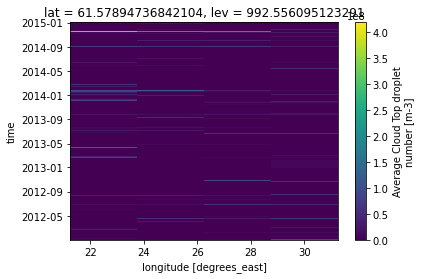

In [24]:
ds_all['ACTNL'].isel(lat=0).plot()

In [25]:
dic_ds=dict()
dic_ds[case_name]= ds_mod

### Broadcast ds_sel to same grid 

Copying the same for as hyytiala for all grid cells for the station variables (st measurements) 

In [58]:
ds_all = ds_all.isel(ilev=-1,cosp_tau_modis=0,  
                                                                        cosp_tau=0,
                                                                       cosp_dbze=0,
                                                                        cosp_ht=0, 
                                                                        cosp_prs = 0,
                                                                       cosp_reffice=0,
                                                                        cosp_htmisr=0,
                                                                        cosp_reffliq=0,
                                                                        cosp_scol=0,
                                                                        cosp_sr=0,
                                                                        cosp_sza=0,
                                                                        nbnd=0
                                                                       ).squeeze()

In [60]:
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')

In [61]:
ds_all#.squeeze()

<xarray.Dataset>
Dimensions:              (time: 23280, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 0.004186 0.002838 ... 0.001226
    ACTNI                (time, lat, lon) float32 1.014e+05 ... 4.365e+04
    ACTNL                (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREI               (time, lat, lon) float32 25.58 13.47 ... 47.3 45.81
    ACTREL               (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    AEROD_v              (time, lat, lon) float32 nan nan nan ... nan nan nan
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time) datetime64[ns] 2012-01-01T23:00:00 ... 2015-0...
    time_written         (time) |S8 b'15:20:36' b'15:20:36' ... b'15:22:02'
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 15:20:36 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [62]:
ds_all 

<xarray.Dataset>
Dimensions:              (time: 23280, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 0.004186 0.002838 ... 0.001226
    ACTNI                (time, lat, lon) float32 1.014e+05 ... 4.365e+04
    ACTNL                (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREI               (time, lat, lon) float32 25.58 13.47 ... 47.3 45.81
    ACTREL               (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    AEROD_v              (time, lat, lon) float32 nan nan nan ... nan nan nan
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time) datetime64[ns] 2012-01-01T23:00:00 ... 2015-0...
    time_written         (time) |S8 b'15:20:36' b'15:20:36' ... b'15:22:02'
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 15:20:36 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [63]:
ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
for v in varl_st:
    ds_all[v] = ds_1[v]

In [65]:
ds_all

<xarray.Dataset>
Dimensions:              (time: 23280, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 0.004186 0.002838 ... 0.001226
    ACTNI                (time, lat, lon) float32 1.014e+05 ... 4.365e+04
    ACTNL                (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREI               (time, lat, lon) float32 25.58 13.47 ... 47.3 45.81
    ACTREL               (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    AEROD_v              (time, lat, lon) float32 nan nan nan ... nan nan nan
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time) datetime64[ns] 2012-01-01T23:00:00 ... 2015-0...
    time_written         (time) |S8 b'15:20:36' b'15:20:36' ... b'15:22:02'
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 15:20:36 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

### Set dic_ds : 

In [66]:
dic_ds = dict()
dic_ds[case_name] =ds_all

Constants:

In [67]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [68]:
ds_all.load()

<xarray.Dataset>
Dimensions:              (time: 23280, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 0.004186 0.002838 ... 0.001226
    ACTNI                (time, lat, lon) float32 1.014e+05 ... 4.365e+04
    ACTNL                (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREI               (time, lat, lon) float32 25.58 13.47 ... 47.3 45.81
    ACTREL               (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    AEROD_v              (time, lat, lon) float32 nan nan nan ... nan nan nan
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time) datetime64[ns] 2012-01-01T23:00:00 ... 2015-0...
    time_written         (time) |S8 b'15:20:36' b'15:20:36' ... b'15:22:02'
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 15:20:36 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

<xarray.Dataset>
Dimensions:              (time: 23280, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Data variables: (12/192)
    ABSVIS               (time, lat, lon) float32 0.004186 0.002838 ... 0.001226
    ACTNI                (time, lat, lon) float32 1.014e+05 ... 4.365e+04
    ACTNL                (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ACTREI               (time, lat, lon) float32 25.58 13.47 ... 47.3

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/tmp/ipykernel_6942/960475182.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['year'] = df_merge.index.get_level_values(0).year


OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full


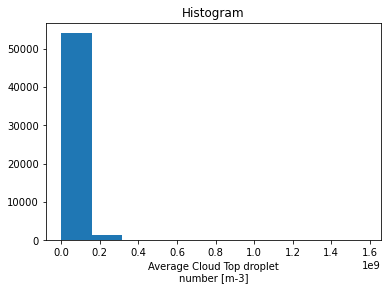

In [90]:
def get_dic_df_mod(model_lev_i=-1):
    


    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        #ds['TOT_ICLD_VISTAU_s']= ds['TOT_ICLD_VISTAU'].sum('lev')
        #ds['TOT_CLD_VISTAU_s']= ds['TOT_CLD_VISTAU'].sum('lev')
        for v in ['TGCLDLWP','TGCLDIWP','TGCLDCWP']:
            if v in ds.data_vars:
                if ds[v].attrs['units'] =='kg/m2':
                    ds[v] = ds[v]*1000
                    ds[v].attrs['units'] = 'g/m2'
                
        
        ds_sel = ds.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( lev=model_lev_i)

        ds_all = ds#.isel(lev=model_lev_i)
        #ds_sel =ds_sel[varl_st]
        ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
        for v in varl_st:
            ds_all[v] = ds_1[v]
        ds_sel = ds_all
        print(ds_all)
        
        rho = pressure*100/(R*ds_sel['T'])

        ds_sel['rho'] = rho
        ds_sel['ACTNL_incld'] = ds_sel['ACTNL']/ds_sel['FCTL']
        ds_sel['ACTREL_incld'] = ds_sel['ACTREL']/ds_sel['FCTL']

        ds_sel['ACTNL_incld'].plot()

        ds_sel_median = ds_sel.resample({'time':'D'}).median()


        #df = ds_sel_median.to_dataframe()

        ls_so4 = [c for c in ds_sel_median.data_vars if 'SO4_' in c]#['SO4_NA']

        ls_so4

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel_median[s].attrs['units']!=un:
                ds_sel_median[s] = ds_sel_median[s]*ds_sel_median['rho']*kg2ug
                ds_sel_median[s].attrs['units']=un
        #ds_sel_med= ds_sel_median.resample(time='D').median()

        df = ds_sel_median.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
        
        df['ACTNL_incld'] = df['ACTNL']/df['FCTL']
        df['ACTREL_incld'] = df['ACTREL']/df['FCTL']
        
    
        df_daily = df#.resample('D').median()

        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.get_level_values(0).year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        #df_s.index = df_s.index.rename('date')
        df_merge = df_s#pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.get_level_values(0).year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df[months]
        ds_month_mask = ds_sel.where((ds_sel['time.month']==7) | (ds_sel['time.month']==8))
        ds_sel_med_y= ds_month_mask.resample(time='Y').median()
        df_ym =ds_sel_med_y.to_dataframe()
        #df_ym = df_s.resample('Y').median()
        #df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_merge
        print(ca)

    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

In [ ]:
dic_df_sm[case_name].columns

In [ ]:
df_mod = dic_df_sm[case_name]

In [ ]:
df_mod.index.get_level_values(1)

In [ ]:
mask_liq_cloudtop = df_mod['FCTL']>0.0001

In [ ]:
df_mod['mask_liq_cloudtop'] = mask_liq_cloudtop

In [ ]:
sel_latlon = (df_mod.index.get_level_values(2)==27.5)&(df_mod.index.get_level_values(1)==61.57894736842104)

df_mod[sel_latlon].reset_index().set_index('time')['TGCLDLWP'].plot()

In [ ]:
df_mod[mask_liq_cloudtop].reset_index().set_index('time')['FCTL'].plot()#ylim=[-.0,.01])

#### Mask values that don't have cloud top liquid

In [ ]:
df_mod = df_mod[df_mod['mask_liq_cloudtop']]

In [ ]:
df_mod['CWP_qcut']=pd.qcut(df_mod['TGCLDLWP'],6)# bins=bins, labels=labels)§

df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)



In [ ]:
bins = pd.IntervalIndex.from_breaks([ 10,  30,  50,  70, 90, 110, 130,500])


df_mod['CWP_cut']=pd.cut(df_mod['TGCLDLWP'], bins=bins)#, labels=labels)

df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)

## Category of OA concentration

In [ ]:
df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)

In [ ]:
#df_mod['OA_low'].loc[:,:] = df_mod['OA']<df_mod['OA'].quantile(.34)
mid_range = ( df_mod['OA'].quantile(.34)<df_mod['OA']) & (df_mod['OA']<df_mod['OA'].quantile(.66))
df_mod['OA_mid_range'] = mid_range

In [ ]:

df_mod=df_mod.assign(OA_category= pd.NA)
df_mod.loc[df_mod['OA_high'], 'OA_category'] = 'OA high'
df_mod.loc[df_mod['OA_low'], 'OA_category'] = 'OA low'



In [ ]:
df_mod[(df_mod.index.get_level_values('lat') >65)& (df_mod.index.get_level_values('lon') == 25.0)]

In [ ]:
import seaborn as sns

In [ ]:
_df = (df_mod[(df_mod['OA_category'].notna()) & (df_mod['TOT_ICLD_VISTAU_s']>0)])
_df = _df[_df['TOT_ICLD_VISTAU_s']<50]
sns.displot(#x='TGCLDLWP', 
            x='TOT_ICLD_VISTAU_s',
            data=_df,
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])
print(len(df_mod[df_mod['OA_category'].notna()]))

In [ ]:
sns.displot(#x='TGCLDLWP', 
            x='ACTNL_incld',
            data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
import seaborn as sns

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            #data=df_mod.reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='violin',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='swarm',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
           # kind='box'
           )

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
            kind='violin'
           )

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
plt.ylim([0,25])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='swarm',
           )
plt.ylim([0,25])